In [1]:
from pathlib import Path
import sys
sys.path.append(str(Path("..").resolve()))

from src.embeddings_database import AutoFaissIndex
import random
from collections import defaultdict
from src.data import get_all_data

In [2]:
images_folder_path = Path("data/kaggle_ashwingupta3012/Images/")
images = list(images_folder_path.glob("*"))
images_sample = random.sample(images, 5)

### Store the embeddings

In [3]:
combined_data_dict = get_all_data(main_data_folder="data/",
                 metadata_to_keep=["name", "keywords"])

new_dict = defaultdict(list)
for i in range(20):
    new_dict['img_path'].append(combined_data_dict['img_path'][i])
    new_dict['name'].append(combined_data_dict['source_name'][i])
    new_dict['keywords'].append(combined_data_dict['source_keywords'][i])

In [4]:
data_folder = "embeddings_store"
face_detect_model = "models/face_detect/mediapipe/"
embeddings_model = "models/embeddings/deepface/"
n_threshold = 100_000

In [5]:
faiss_index = AutoFaissIndex(
                 index_path=data_folder,
                 face_detect_model=face_detect_model,
                 embeddings_model=embeddings_model,
                 n_threshold=n_threshold
)

Loading existing FAISS index...


In [6]:
from src.image import show_image

In [7]:
# faiss_index.populate_images(new_dict)

In [8]:
n = 3500

In [9]:
scores, ids, metadata = faiss_index.search_image(images[n])

[INFO] Initializing the models...
[INFO] Loading DeepFace model: ArcFace ...
[INFO] Model 'ArcFace' loaded successfully.


In [10]:
scores

array([[6.611492, 6.240669, 6.179785, 6.092548, 5.879442]], dtype=float32)

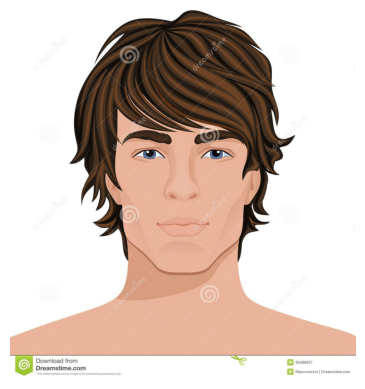

In [11]:
show_image(images[n])

data\kaggle_ashwingupta3012\images\1 (1041).jpg


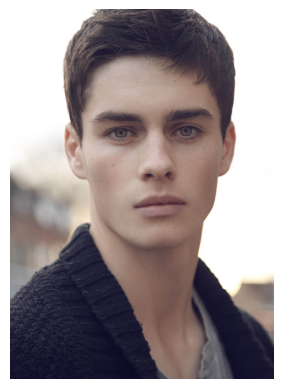

data\kaggle_ashwingupta3012\images\1 (1014).jpg


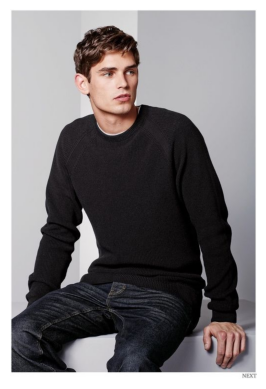

data\kaggle_ashwingupta3012\images\1 (1074).jpg


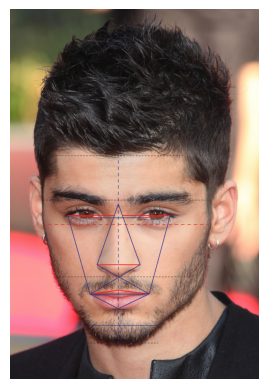

data\kaggle_ashwingupta3012\images\1 (1070).jpg


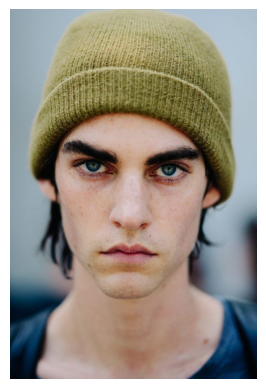

data\kaggle_ashwingupta3012\images\1 (1026).jpg


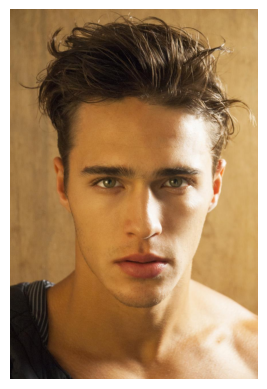

In [12]:
for i in ids[0]:
    path = metadata[0].loc[i, "img_path"]
    print(path)
    show_image(path)

### By reading the image

In [13]:
from src.image import read_image

In [14]:
n = 1000

In [15]:
image_np = read_image(images[n])


In [17]:
scores, ids, metadata = faiss_index.search_image(image_np)

In [19]:
ids

array([[22,  1, 85, 41, 40]], dtype=int64)

In [23]:
list(metadata[0].img_path)

['data\\kaggle_ashwingupta3012\\images\\1 (1).jpg',
 'data\\kaggle_ashwingupta3012\\images\\1 (1015).jpg',
 'data\\kaggle_ashwingupta3012\\images\\1 (1031).jpg',
 'data\\kaggle_ashwingupta3012\\images\\1 (1032).jpg',
 'data\\kaggle_ashwingupta3012\\images\\1 (1073).jpg']

In [50]:
scores

array([[7.188324 , 5.105034 , 4.162777 , 3.5871043, 3.365932 ]],
      dtype=float32)

In [32]:
metadata[0].img_path.iloc[ids[0]]

IndexError: positional indexers are out-of-bounds

In [27]:
metadata[0].img_path.iloc[ids[0], :]

IndexingError: Too many indexers